4.400000000004267


/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log
/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in log


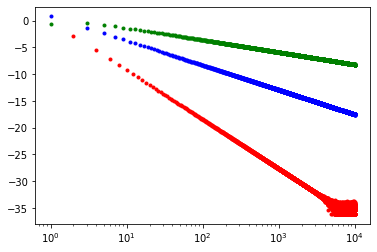

In [53]:

import numpy as np
import matplotlib.pyplot as plt


# In[22]:


def f(x):
	val=x**4-2*x+1
	return val

#setting endpoints and number of values
N=1000
a=0.
b=5.

def riemann_dan(f,a,b,N):
#setting bin width
	delta_x=(b-a)/N

#Create empty list
	xvals=[]
	yvals=[]
	s=0

#Loop over all y values
	for i in range(0,N,1):
#set x value at left edge of bin
		x=a+i*delta_x
#set function value of bin
		y=f(x)
#append x and y to list
		xvals.append(x)
		yvals.append(y)
#increment sum	
		s+=y
	s*=delta_x
	return s


def trapezoid(f,a,b,N):
    h = (b-a)/N
    fa = f(a)
    fb = f(b)
    y = 0
    for i in range(1,N):
        y += (f(a+i*h))
    s = h*(.5*fa + .5*fb + y)
    return s
        
    
        
def simpson(f,a,b,N):
    h = (b-a)/N
    fa = f(a)
    fb = f(b)
    y1 = 0
    y2 = 0
    for i in range(1,N,2):
        y1+= f(a+i*h)
    for i in range(2,N-1,2):
        y2 += f(a+i*h)
    s = 1/3*h*(fa + fb + 4*y1 + 2*y2)
    return s
        
    
    


# In[23]:


print(simpson(f,0,2,1000))

count = 10000
errorsimp = np.zeros([count])
errortrap = np.zeros([count])
errorriem = np.zeros([count])
steps = np.zeros([count])
for n in range (2,count-1,2):
    errorsimp[n] = (abs(4.4-simpson(f,0,2,n)))/4.4
    steps[n] = n

for n in range (1,count,2):
    errortrap[n] = (abs(4.4-trapezoid(f,0,2,n)))/4.4
    steps[n] = n

for n in range (1,count,2):
    errorriem[n] = (abs(4.4-riemann_dan(f,0,2,n)))/4.4
    steps[n] = n

error[0] = error[1]
steps[0] = steps[1]
plt.plot(steps,np.log(errorsimp),"r.")
plt.plot(steps,np.log(errortrap),"b.")
plt.plot(steps,np.log(errorriem),"g.")
plt.xscale('log')
plt.show()

